<a href="https://colab.research.google.com/github/Taniya2711/Data-Analysis-project/blob/main/Convolve_3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras scikit-learn pandas numpy matplotlib

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

## ================================ ##

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold

#EDA

In [ ]:
df=pd.read_csv("Dev_data_to_be_shared.csv")
print(df.shape)
df.head()

(96806, 1216)


,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_describe=pd.DataFrame(df.describe())
df_describe

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
count,96806.000000,96806.000000,7.157500e+04,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,71575.000000,...,94212.0,94212.000000,94212.000000,94212.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000,11610.000000
mean,48403.500000,0.014173,1.542391e+05,9.570769,0.002207,4.092854,77.306435,0.006315,67.043550,0.081034,...,0.0,0.189657,0.044283,7.800673,0.588114,1.497158,0.545650,1.430491,0.121447,0.119208
std,27945.629417,0.118203,1.729925e+05,1513.967595,0.119240,301.580599,3164.987013,0.129545,2516.330899,14.203615,...,0.0,0.597298,0.369451,8.655149,1.059613,1.702795,1.055865,1.728950,0.601256,0.599697
min,1.000000,0.000000,2.500000e+04,0.000000,0.000000,0.000000,-109800.476600,0.000000,-3498.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24202.250000,0.000000,5.900000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,48403.500000,0.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,72604.750000,0.000000,1.810000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,11.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000
max,96806.000000,1.000000,2.800000e+06,398936.791000,25.000000,55000.000000,358986.000000,12.000000,358986.000000,3150.000000,...,0.0,18.000000,14.000000,102.000000,19.000000,38.000000,19.000000,38.000000,15.000000,15.000000


In [ ]:
original_df=df

In [ ]:
null_count=pd.DataFrame(df.isnull().sum())

In [ ]:
null_count.columns=['count']

#Handling Missing Values

In [ ]:
to_drop_list=[]

for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]>30000):
            print(index)
            to_drop_list.append(index)

bureau_147
bureau_148
bureau_433
bureau_434
bureau_435
bureau_436
bureau_437
bureau_438
bureau_440
bureau_444
bureau_445
bureau_446
bureau_447
bureau_448
bureau_449
bureau_451
onus_attribute_6
onus_attribute_7
onus_attribute_9
onus_attribute_43
onus_attribute_44
onus_attribute_45
onus_attribute_46
onus_attribute_47
onus_attribute_48


In [ ]:
df=df.drop(columns=to_drop_list)

In [ ]:
null_count=pd.DataFrame(df.isnull().sum())
null_count

,0
account_number,0
bad_flag,0
onus_attribute_1,25231
transaction_attribute_1,25231
transaction_attribute_2,25231
...,...
bureau_enquiry_46,2594
bureau_enquiry_47,2594
bureau_enquiry_48,2594
bureau_enquiry_49,2594


In [ ]:
sum=0
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]==25231):
            print(index)
            sum+=1
print(sum)

onus_attribute_1
transaction_attribute_1
transaction_attribute_2
transaction_attribute_3
transaction_attribute_4
transaction_attribute_5
transaction_attribute_6
transaction_attribute_7
transaction_attribute_8
transaction_attribute_9
transaction_attribute_10
transaction_attribute_11
transaction_attribute_12
transaction_attribute_13
transaction_attribute_14
transaction_attribute_15
transaction_attribute_16
transaction_attribute_17
transaction_attribute_18
transaction_attribute_19
transaction_attribute_20
transaction_attribute_21
transaction_attribute_22
transaction_attribute_23
transaction_attribute_24
transaction_attribute_25
transaction_attribute_26
transaction_attribute_27
transaction_attribute_28
transaction_attribute_29
transaction_attribute_30
transaction_attribute_31
transaction_attribute_32
transaction_attribute_33
transaction_attribute_34
transaction_attribute_35
transaction_attribute_36
transaction_attribute_37
transaction_attribute_38
transaction_attribute_39
transaction_attri

In [ ]:
column_to_check = 'transaction_attribute_1'
df_25k = df.dropna(subset=[column_to_check])

print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape after dropping rows: {df_25k.shape}")

Original DataFrame shape: (96806, 1191)
New DataFrame shape after dropping rows: (71575, 1191)


In [ ]:
null_count=pd.DataFrame(df_25k.isnull().sum())
null_count.columns=['count']
null_count



,count
account_number,0
bad_flag,0
onus_attribute_1,0
transaction_attribute_1,0
transaction_attribute_2,0
...,...
bureau_enquiry_46,1886
bureau_enquiry_47,1886
bureau_enquiry_48,1886
bureau_enquiry_49,1886


In [ ]:
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

transaction_attribute_118 209
transaction_attribute_119 209
transaction_attribute_120 209
transaction_attribute_121 209
transaction_attribute_122 209
transaction_attribute_123 209
transaction_attribute_124 209
transaction_attribute_125 209
transaction_attribute_126 209
transaction_attribute_127 209
transaction_attribute_128 209
transaction_attribute_129 209
transaction_attribute_130 209
transaction_attribute_131 209
transaction_attribute_132 209
transaction_attribute_133 209
transaction_attribute_134 209
transaction_attribute_135 209
transaction_attribute_136 209
transaction_attribute_137 209
transaction_attribute_138 209
transaction_attribute_139 209
transaction_attribute_140 209
transaction_attribute_141 209
transaction_attribute_142 209
transaction_attribute_143 209
transaction_attribute_144 209
transaction_attribute_145 209
transaction_attribute_146 209
transaction_attribute_147 209
transaction_attribute_148 209
transaction_attribute_149 209
transaction_attribute_150 209
transactio

In [ ]:
column_to_check = 'bureau_1'
df_935 = df_25k.dropna(subset=[column_to_check])

print(f"Original DataFrame shape: {df_25k.shape}")
print(f"New DataFrame shape after dropping rows: {df_935.shape}")

Original DataFrame shape: (71575, 1191)
New DataFrame shape after dropping rows: (70640, 1191)


In [ ]:
null_count=pd.DataFrame(df_935.isnull().sum())
null_count.columns=['count']
null_count

,count
account_number,0
bad_flag,0
onus_attribute_1,0
transaction_attribute_1,0
transaction_attribute_2,0
...,...
bureau_enquiry_46,1100
bureau_enquiry_47,1100
bureau_enquiry_48,1100
bureau_enquiry_49,1100


In [ ]:
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

transaction_attribute_118 206
transaction_attribute_119 206
transaction_attribute_120 206
transaction_attribute_121 206
transaction_attribute_122 206
transaction_attribute_123 206
transaction_attribute_124 206
transaction_attribute_125 206
transaction_attribute_126 206
transaction_attribute_127 206
transaction_attribute_128 206
transaction_attribute_129 206
transaction_attribute_130 206
transaction_attribute_131 206
transaction_attribute_132 206
transaction_attribute_133 206
transaction_attribute_134 206
transaction_attribute_135 206
transaction_attribute_136 206
transaction_attribute_137 206
transaction_attribute_138 206
transaction_attribute_139 206
transaction_attribute_140 206
transaction_attribute_141 206
transaction_attribute_142 206
transaction_attribute_143 206
transaction_attribute_144 206
transaction_attribute_145 206
transaction_attribute_146 206
transaction_attribute_147 206
transaction_attribute_148 206
transaction_attribute_149 206
transaction_attribute_150 206
transactio

In [ ]:
column_to_check = 'bureau_enquiry_1'
df_1100= df_935.dropna(subset=[column_to_check])

print(f"Original DataFrame shape: {df_935.shape}")
print(f"New DataFrame shape after dropping rows: {df_1100.shape}")

Original DataFrame shape: (70640, 1191)
New DataFrame shape after dropping rows: (69540, 1191)


In [ ]:
null_count=pd.DataFrame(df_1100.isnull().sum())
null_count.columns=['count']
null_count

,count
account_number,0
bad_flag,0
onus_attribute_1,0
transaction_attribute_1,0
transaction_attribute_2,0
...,...
bureau_enquiry_46,0
bureau_enquiry_47,0
bureau_enquiry_48,0
bureau_enquiry_49,0


In [ ]:
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

transaction_attribute_118 199
transaction_attribute_119 199
transaction_attribute_120 199
transaction_attribute_121 199
transaction_attribute_122 199
transaction_attribute_123 199
transaction_attribute_124 199
transaction_attribute_125 199
transaction_attribute_126 199
transaction_attribute_127 199
transaction_attribute_128 199
transaction_attribute_129 199
transaction_attribute_130 199
transaction_attribute_131 199
transaction_attribute_132 199
transaction_attribute_133 199
transaction_attribute_134 199
transaction_attribute_135 199
transaction_attribute_136 199
transaction_attribute_137 199
transaction_attribute_138 199
transaction_attribute_139 199
transaction_attribute_140 199
transaction_attribute_141 199
transaction_attribute_142 199
transaction_attribute_143 199
transaction_attribute_144 199
transaction_attribute_145 199
transaction_attribute_146 199
transaction_attribute_147 199
transaction_attribute_148 199
transaction_attribute_149 199
transaction_attribute_150 199
transactio

In [ ]:
column_to_check = 'transaction_attribute_118'
df_199= df_1100.dropna(subset=[column_to_check])

print(f"Original DataFrame shape: {df_1100.shape}")
print(f"New DataFrame shape after dropping rows: {df_199.shape}")

Original DataFrame shape: (69540, 1191)
New DataFrame shape after dropping rows: (69341, 1191)


In [ ]:
null_count=pd.DataFrame(df_199.isnull().sum())
null_count.columns=['count']
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

transaction_attribute_548 23
transaction_attribute_549 23
transaction_attribute_550 23
transaction_attribute_551 23
transaction_attribute_552 23
transaction_attribute_553 23
transaction_attribute_554 23
transaction_attribute_555 23
transaction_attribute_556 23
transaction_attribute_557 23
transaction_attribute_558 23
transaction_attribute_559 23
transaction_attribute_560 23
transaction_attribute_561 23
transaction_attribute_562 23
transaction_attribute_563 23
transaction_attribute_564 23
transaction_attribute_565 23
transaction_attribute_566 23
transaction_attribute_567 23
transaction_attribute_568 23
transaction_attribute_569 23
transaction_attribute_570 23
transaction_attribute_571 23
transaction_attribute_572 23
transaction_attribute_573 23
transaction_attribute_574 23
transaction_attribute_575 23
transaction_attribute_576 23
transaction_attribute_577 23
transaction_attribute_578 23
transaction_attribute_579 23
transaction_attribute_580 23
transaction_attribute_581 23
transaction_at

In [ ]:
to_drop_list=[]

for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]>20000):
            print(index)
            to_drop_list.append(index)

onus_attribute_8
onus_attribute_11
onus_attribute_12
onus_attribute_14
onus_attribute_15


In [ ]:
df_20k=df_199.drop(columns=to_drop_list)

In [ ]:
null_count=pd.DataFrame(df_20k.isnull().sum())
null_count.columns=['count']
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

transaction_attribute_548 23
transaction_attribute_549 23
transaction_attribute_550 23
transaction_attribute_551 23
transaction_attribute_552 23
transaction_attribute_553 23
transaction_attribute_554 23
transaction_attribute_555 23
transaction_attribute_556 23
transaction_attribute_557 23
transaction_attribute_558 23
transaction_attribute_559 23
transaction_attribute_560 23
transaction_attribute_561 23
transaction_attribute_562 23
transaction_attribute_563 23
transaction_attribute_564 23
transaction_attribute_565 23
transaction_attribute_566 23
transaction_attribute_567 23
transaction_attribute_568 23
transaction_attribute_569 23
transaction_attribute_570 23
transaction_attribute_571 23
transaction_attribute_572 23
transaction_attribute_573 23
transaction_attribute_574 23
transaction_attribute_575 23
transaction_attribute_576 23
transaction_attribute_577 23
transaction_attribute_578 23
transaction_attribute_579 23
transaction_attribute_580 23
transaction_attribute_581 23
transaction_at

In [ ]:
df_describe_cleaned=df_20k.describe()

In [ ]:
df_describe_cleaned.shape

(8, 1186)

In [ ]:
df_describe_cleaned.isnull().sum()

,0
account_number,0
bad_flag,0
onus_attribute_1,0
transaction_attribute_1,0
transaction_attribute_2,0
...,...
bureau_enquiry_46,0
bureau_enquiry_47,0
bureau_enquiry_48,0
bureau_enquiry_49,0


In [ ]:
df_describe_cleaned.to_csv("df_describe_cleaned.csv",index=True)

In [ ]:
df_fillna = df_20k.fillna(df_20k.median())
df_fillna.to_csv('dataset_zero_missing.csv', index=False)

In [ ]:
null_count=pd.DataFrame(df_fillna.isnull().sum())
null_count.columns=['count']
for index, row in null_count.iterrows():
    for col_name in null_count.columns:
        if (row[col_name]!=0):
            print(index,row[col_name])

#Dimensionality Reduction

In [ ]:
df_fillna=pd.read_csv('dataset_zero_missing.csv')
df_fillna.shape

(69341, 1186)

In [ ]:
X = df_fillna.iloc[:, 2:]
y = df_fillna['bad_flag']

In [ ]:
variances = X.var()

# View the distribution of variances
print(variances.describe())

count    1.184000e+03
mean     6.027968e+11
std      8.707991e+12
min      0.000000e+00
25%      7.690051e-03
50%      7.908965e-02
75%      4.444538e+01
max      2.357234e+14
dtype: float64


In [ ]:
# Apply a variance threshold
selector = VarianceThreshold(threshold=0.07)  # Minimum variance threshold
reduced_data = selector.fit_transform(X)

# Get the remaining columns
remaining_columns = X.columns[selector.get_support()]
print(f"Remaining columns after variance thresholding: {len(remaining_columns)}")

Remaining columns after variance thresholding: 603


In [ ]:
# Drop columns that were not selected
columns_to_keep = list(remaining_columns)
X_after_variance_thresholding = X[columns_to_keep]

print(f"Shape of the reduced DataFrame: {X_after_variance_thresholding.shape}")

Shape of the reduced DataFrame: (69341, 603)


#Removing Columns with High Correlation

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_after_variance_thresholding, 0.9)

In [ ]:
X_corr = X_after_variance_thresholding.drop(corr_features, axis=1)
features_left = X_corr.shape[1]
print(f'After removing {len(corr_features)} features, there are {features_left} features left.')

After removing 189 features, there are 414 features left.


In [ ]:
X_corr.to_csv("X_corr_414.csv")

In [ ]:
y.to_csv("y_cleaned.csv")

In [ ]:
X_corr=pd.read_csv('X_corr_414.csv')
y=pd.read_csv('y_cleaned.csv')

In [ ]:
X_corr=X_corr.iloc[:,1:]

In [ ]:
y=y.iloc[:,1:]

Correlation with Target

In [ ]:
def corrwith_target(dataframe, target, threshold):
    cor = dataframe.corr()
    cor_target = abs(cor[target])
    relevant_features = cor_target[cor_target<threshold]
    return relevant_features.index.tolist()[:-1]

In [ ]:
dummy_train = X_corr.copy()
dummy_train['bad_flag'] = y

In [ ]:
corrwith_cols = corrwith_target(dummy_train, 'bad_flag', 0.01)
X_corr_target = X_corr.drop(corrwith_cols, axis=1)
features_target_left = X_corr_target.shape[1]
print(f'After removing {len(corrwith_cols)} features, there are {features_target_left} features left.')

After removing 225 features, there are 189 features left.


In [ ]:
columns_to_keep=X_corr_target.columns
columns_to_keep

Index(['onus_attribute_1', 'transaction_attribute_11',
       'transaction_attribute_22', 'transaction_attribute_24',
       'transaction_attribute_32', 'transaction_attribute_33',
       'transaction_attribute_34', 'transaction_attribute_36',
       'transaction_attribute_44', 'transaction_attribute_47',
       ...
       'bureau_enquiry_28', 'bureau_enquiry_30', 'bureau_enquiry_31',
       'bureau_enquiry_32', 'bureau_enquiry_34', 'bureau_enquiry_35',
       'bureau_enquiry_38', 'bureau_enquiry_40', 'bureau_enquiry_44',
       'bureau_enquiry_48'],
      dtype='object', length=189)

#Model Training and Tuning

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_corr_target, y, test_size=0.33, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
negative_class = (y_train == 0).sum()
positive_class = (y_train == 1).sum()
scale_pos_weight = negative_class / positive_class

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model Training
history = model.fit(
    X_train, y_train.to_numpy(),
    validation_data=(X_test, y_test.to_numpy()),
    epochs=30,
    batch_size=64,
    class_weight={0: 1.0, 1: scale_pos_weight},
    callbacks=[early_stopping]
)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Epoch 1/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.6892 - loss: 1.3764 - val_accuracy: 0.6406 - val_loss: 0.5567
Epoch 2/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6355 - loss: 1.1337 - val_accuracy: 0.5672 - val_loss: 0.6035
Epoch 3/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6315 - loss: 1.0866 - val_accuracy: 0.6811 - val_loss: 0.5779
Epoch 4/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7059 - loss: 0.9656 - val_accuracy: 0.6856 - val_loss: 0.4808
Epoch 5/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7016 - loss: 0.9512 - val_accuracy: 0.6431 - val_loss: 0.5509
Epoch 6/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6902 - loss: 0.9301 - val_accuracy: 0.6195 - val_loss: 0.5807
Epoch 7/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7003 - loss: 0.9089 - val_accuracy: 0.6946 - val_loss: 0.4682
Epoch 8/30
726/726 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7174 - loss: 0.8892 - val_accuracy: 0.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.15876414805750994

ROC AUC Score: 0.7656551352480018


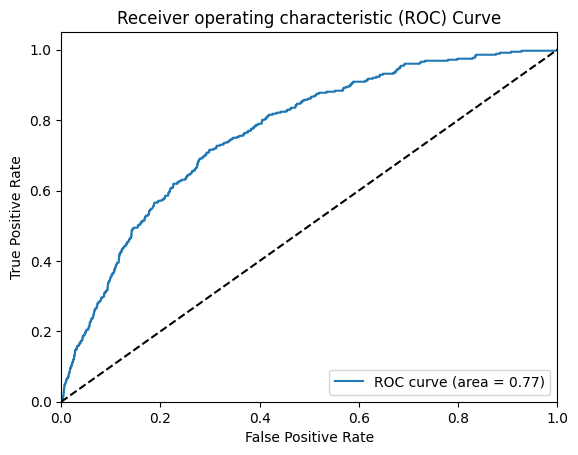

In [ ]:
# prompt: Also calculate ROC-AUC

import matplotlib.pyplot as plt
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ResNet Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model

def build_resnet(input_dim, num_hidden_units=64, num_blocks=3, dropout_rate=0.5, l2_reg=0.01):
    """
    BuildING a ResNet-inspired architecture for tabular data.

    Parameters:
    - input_dim: Number of features in the input data.
    - num_hidden_units: Number of neurons in hidden layers.
    - num_blocks: Number of residual blocks.
    - dropout_rate: Dropout rate for regularization.
    - l2_reg: L2 regularization strength.

    Returns:
    - model: A compiled ResNet-inspired model.
    """
    input_layer = Input(shape=(input_dim,))

    # Initial Dense Layer
    x = Dense(num_hidden_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    # Residual Blocks
    for _ in range(num_blocks):
        shortcut = x

        # First layer of the block
        x = Dense(num_hidden_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rate)(x)

        # Second layer of the block
        x = Dense(num_hidden_units, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        x = BatchNormalization()(x)

        # Add shortcut connection
        x = Add()([shortcut, x])
        x = Activation('relu')(x)
        x = Dropout(dropout_rate)(x)

    # Output Layer
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model

input_dim = X_train.shape[1]
model = build_resnet(input_dim, num_hidden_units=128, num_blocks=3, dropout_rate=0.5, l2_reg=0.01)

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

y_train_np = np.array(y_train)

# Train the model
history = model.fit(
    X_train, y_train_np,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight={0: 1.0, 1: scale_pos_weight},
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]
)

Epoch 1/100
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - AUC: 0.5386 - Precision: 0.0164 - Recall: 0.4895 - accuracy: 0.5680 - loss: 12.7719 - val_AUC: 0.7300 - val_Precision: 0.0454 - val_Recall: 0.3267 - val_accuracy: 0.8783 - val_loss: 7.9998
Epoch 2/100
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - AUC: 0.6167 - Precision: 0.0194 - Recall: 0.5528 - accuracy: 0.6164 - loss: 9.3671 - val_AUC: 0.7368 - val_Precision: 0.0444 - val_Recall: 0.4267 - val_accuracy: 0.8423 - val_loss: 6.3950
Epoch 3/100
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - AUC: 0.7005 - Precision: 0.0257 - Recall: 0.6627 - accuracy: 0.6314 - loss: 6.7990 - val_AUC: 0.7530 - val_Precision: 0.0558 - val_Recall: 0.3667 - val_accuracy: 0.8897 - val_loss: 4.4111
Epoch 4/100
1162/1162 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - AUC: 0.7097 - Precision: 0.0280 - Recall: 0.6489 - accuracy: 0.6849 - loss: 4.8167 - val_AUC: 0.7639 - val_Precision: 0.0487 - val_Recall: 0.4600 - val_accuracy: 0.8461 - val_loss: 2.9224
Epoch 5/100
1162/1

In [ ]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

716/716 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7391076344884849
Precision: 0.04458495460440986
Recall: 0.78125
F1 Score: 0.0843558282208589
Confusion Matrix:
 [[16638  5893]
 [   77   275]]


In [ ]:


mae = mean_absolute_error(y_test, y_pred)
mae



0.2608923655115151

ROC AUC Score: 0.8143083670579122


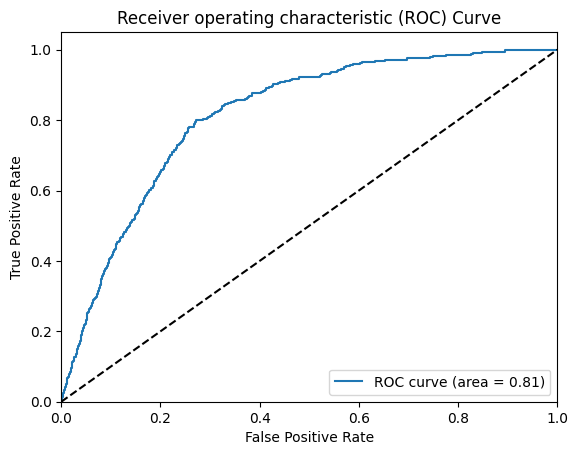

In [ ]:
# prompt: ALso calculate ROC-AUC

import matplotlib.pyplot as plt
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve
)
import matplotlib.pyplot as plt

Confusion Matrix (Decision Tree):
 [[22071   460]
 [  323    29]]

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     22531
           1       0.06      0.08      0.07       352

    accuracy                           0.97     22883
   macro avg       0.52      0.53      0.53     22883
weighted avg       0.97      0.97      0.97     22883


ROC-AUC Score (Decision Tree): 0.530985024168721


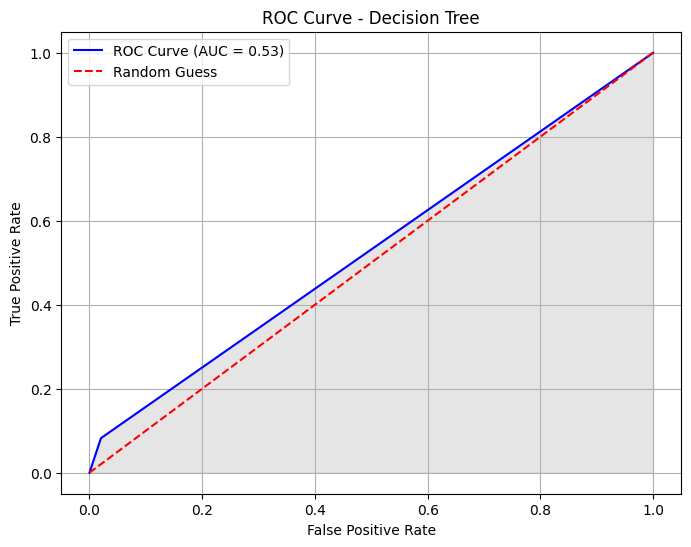

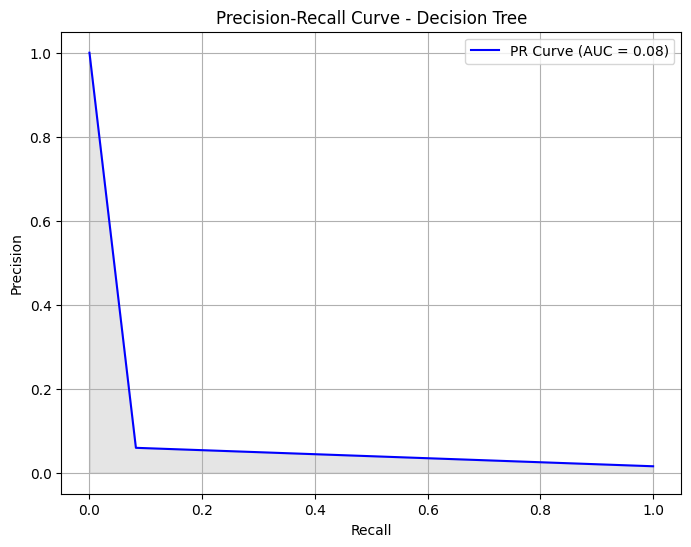

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = dt_model.predict(X_test)
y_prob = dt_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Decision Tree):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc='best')
plt.grid()
plt.show()

Random Forest Classifier

Confusion Matrix (Random Forest):
 [[22531     0]
 [  352     0]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     22531
           1       0.00      0.00      0.00       352

    accuracy                           0.98     22883
   macro avg       0.49      0.50      0.50     22883
weighted avg       0.97      0.98      0.98     22883


ROC-AUC Score (Random Forest): 0.7299265204304373


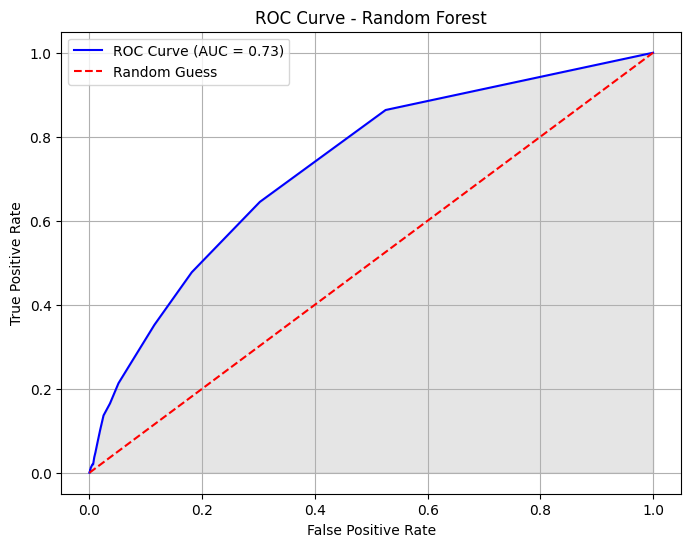

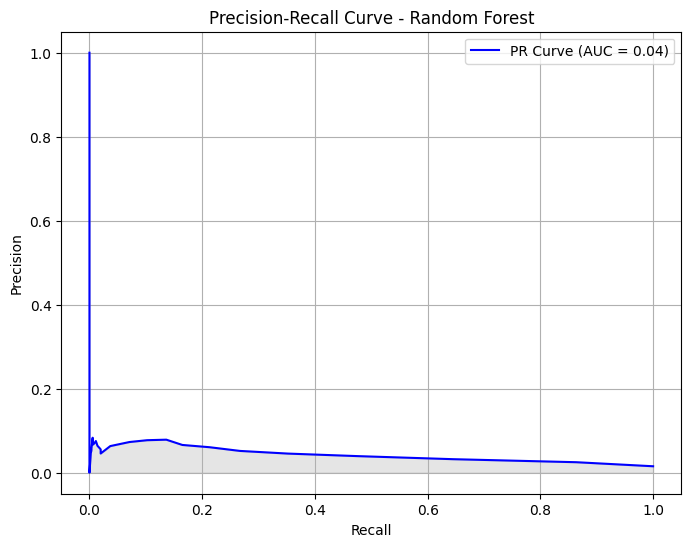

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Random Forest):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

Naive Bayes

Confusion Matrix (Naive Bayes):
 [[12322 10209]
 [   54   298]]

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       1.00      0.55      0.71     22531
           1       0.03      0.85      0.05       352

    accuracy                           0.55     22883
   macro avg       0.51      0.70      0.38     22883
weighted avg       0.98      0.55      0.70     22883


ROC-AUC Score (Naive Bayes): 0.7702999352407391


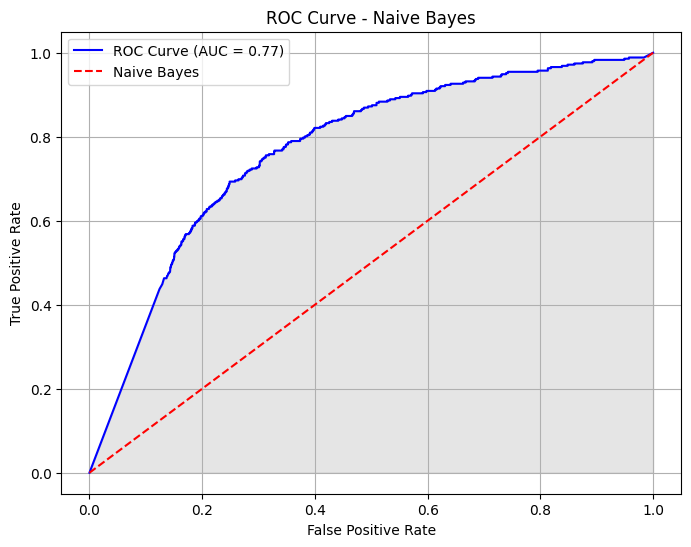

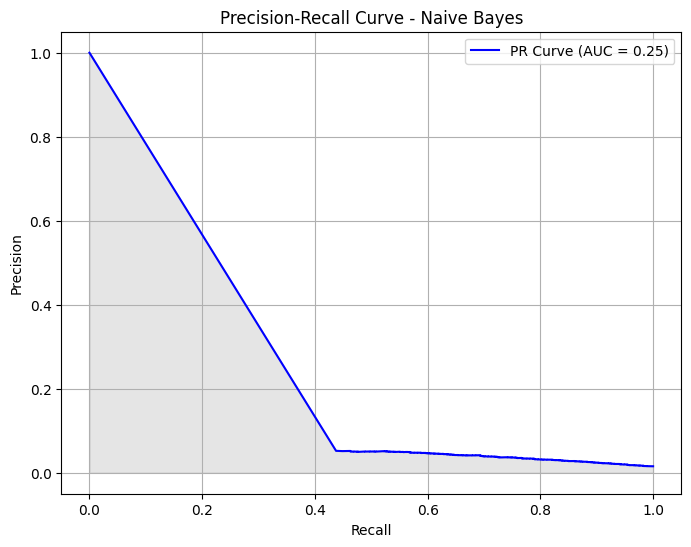

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Naive Bayes):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Naive Bayes):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Naive Bayes')
plt.legend(loc='best')
plt.grid()
plt.show()

XGBoost

Confusion Matrix (XGBoost):
 [[22525     6]
 [  351     1]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     22531
           1       0.14      0.00      0.01       352

    accuracy                           0.98     22883
   macro avg       0.56      0.50      0.50     22883
weighted avg       0.97      0.98      0.98     22883


ROC-AUC Score (XGBoost): 0.7563335717254207


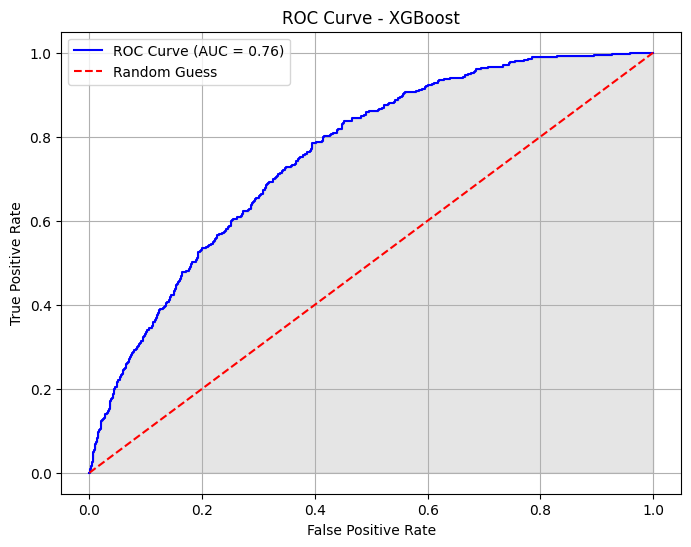

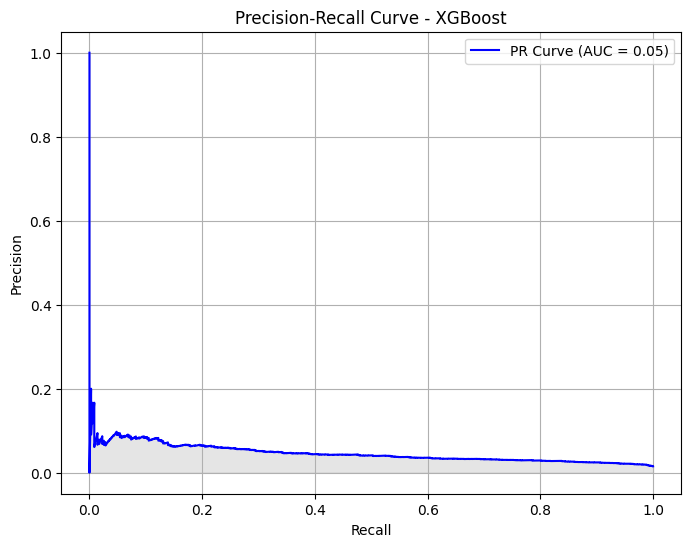

In [ ]:
from xgboost import XGBClassifier

# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (XGBoost):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc='best')
plt.grid()
plt.show()

CatBoost

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00


Confusion Matrix (Catboost):
 [[22530     1]
 [  352     0]]

Classification Report (Catboost):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     22531
           1       0.00      0.00      0.00       352

    accuracy                           0.98     22883
   macro avg       0.49      0.50      0.50     22883
weighted avg       0.97      0.98      0.98     22883


ROC-AUC Score (Catboost): 0.8221865278545517


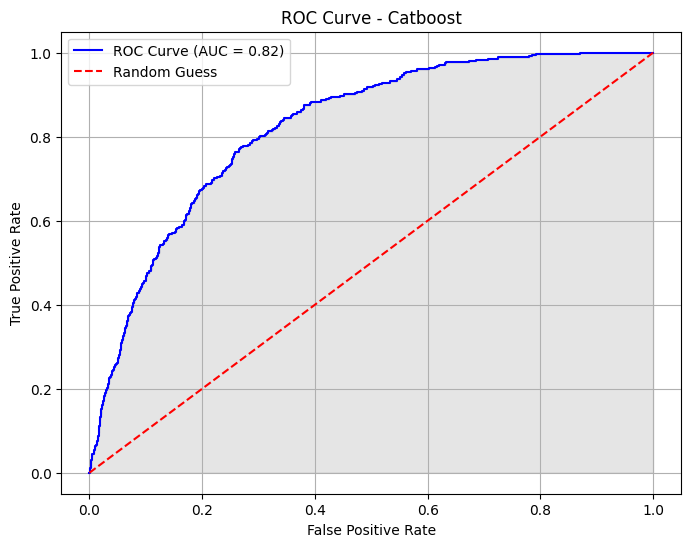

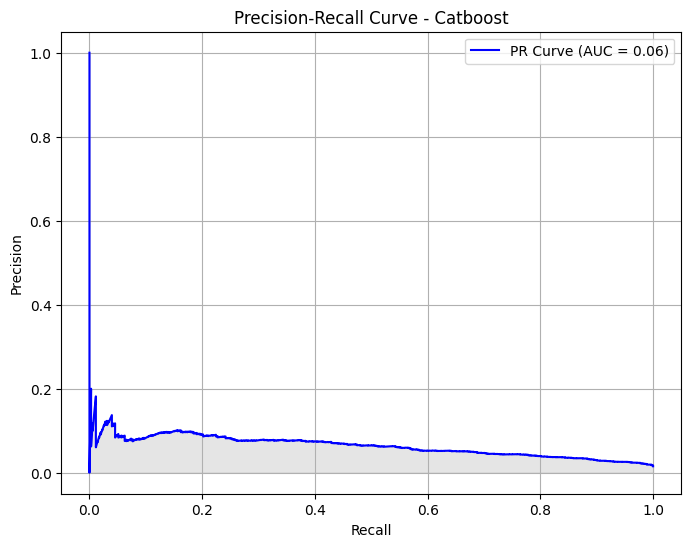

In [ ]:
from catboost import CatBoostClassifier

# Initialize and train
catboost_model = CatBoostClassifier(verbose=0)
catboost_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = catboost_model.predict(X_test)
y_prob = catboost_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)
# Confusion Matrix
print("Confusion Matrix (Catboost):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (Catboost):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (Catboost):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Catboost')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Catboost')
plt.legend(loc='best')
plt.grid()
plt.show()

Gradient Boost Machine

Confusion Matrix (GBM):
 [[22502    29]
 [  350     2]]

Classification Report (GBM):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     22531
           1       0.06      0.01      0.01       352

    accuracy                           0.98     22883
   macro avg       0.52      0.50      0.50     22883
weighted avg       0.97      0.98      0.98     22883


ROC-AUC Score (GBM): 0.816236833796668


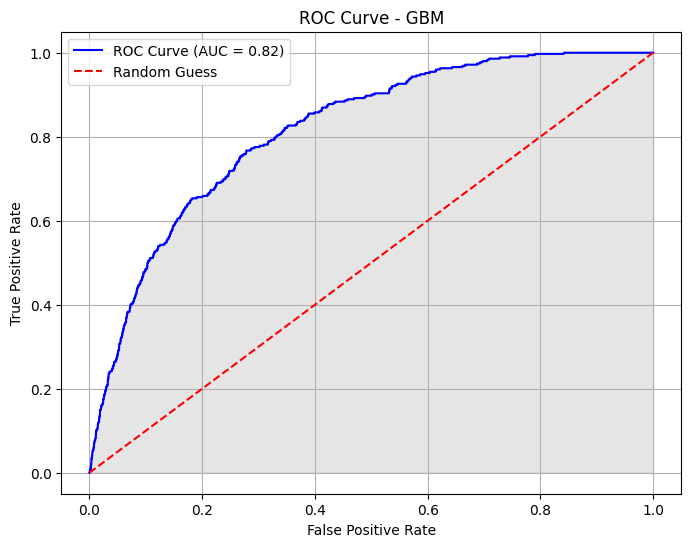

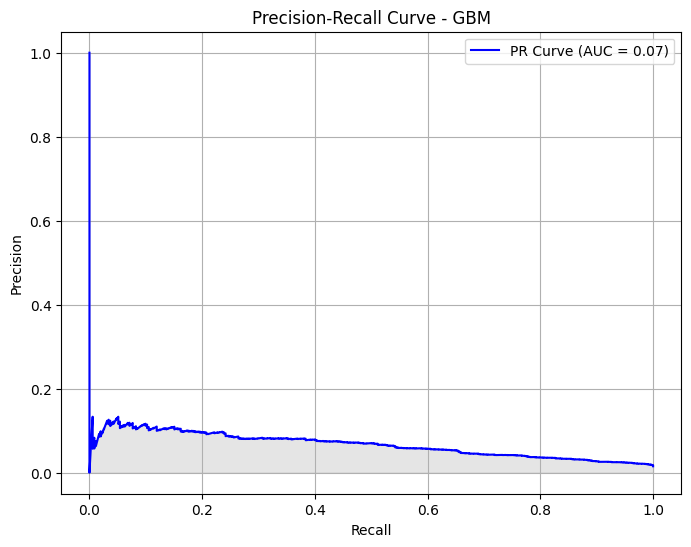

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred = gbm_model.predict(X_test)
y_prob = gbm_model.predict_proba(X_test)[:, 1]

# (Repeat the metrics and visualizations as above)

# Confusion Matrix
print("Confusion Matrix (GBM):\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report (GBM):\n", classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score (GBM):", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.fill_between(fpr, tpr, alpha=0.2, color='gray')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - GBM')
plt.legend(loc='best')
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.2f})', color='blue')
plt.fill_between(recall, precision, alpha=0.2, color='gray')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - GBM')
plt.legend(loc='best')
plt.grid()
plt.show()


#Visualizing ResNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model

def build_resnet(input_dim, num_hidden_units=64, num_blocks=3, dropout_rate=0.5, l2_reg=0.01):
    """
    BuildING a ResNet-inspired architecture for tabular data.

    Parameters:
    - input_dim: Number of features in the input data.
    - num_hidden_units: Number of neurons in hidden layers.
    - num_blocks: Number of residual blocks.
    - dropout_rate: Dropout rate for regularization.
    - l2_reg: L2 regularization strength.

    Returns:
    - model: A compiled ResNet-inspired model.
    """
    input_layer = Input(shape=(input_dim,))

    # Initial Dense Layer
    x = Dense(num_hidden_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(input_layer)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)

    # Residual Blocks
    for _ in range(num_blocks):
        shortcut = x

        # First layer of the block
        x = Dense(num_hidden_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rate)(x)

        # Second layer of the block
        x = Dense(num_hidden_units, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        x = BatchNormalization()(x)

        # Add shortcut connection
        x = Add()([shortcut, x])
        x = Activation('relu')(x)
        x = Dropout(dropout_rate)(x)

    # Output Layer
    output_layer = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model


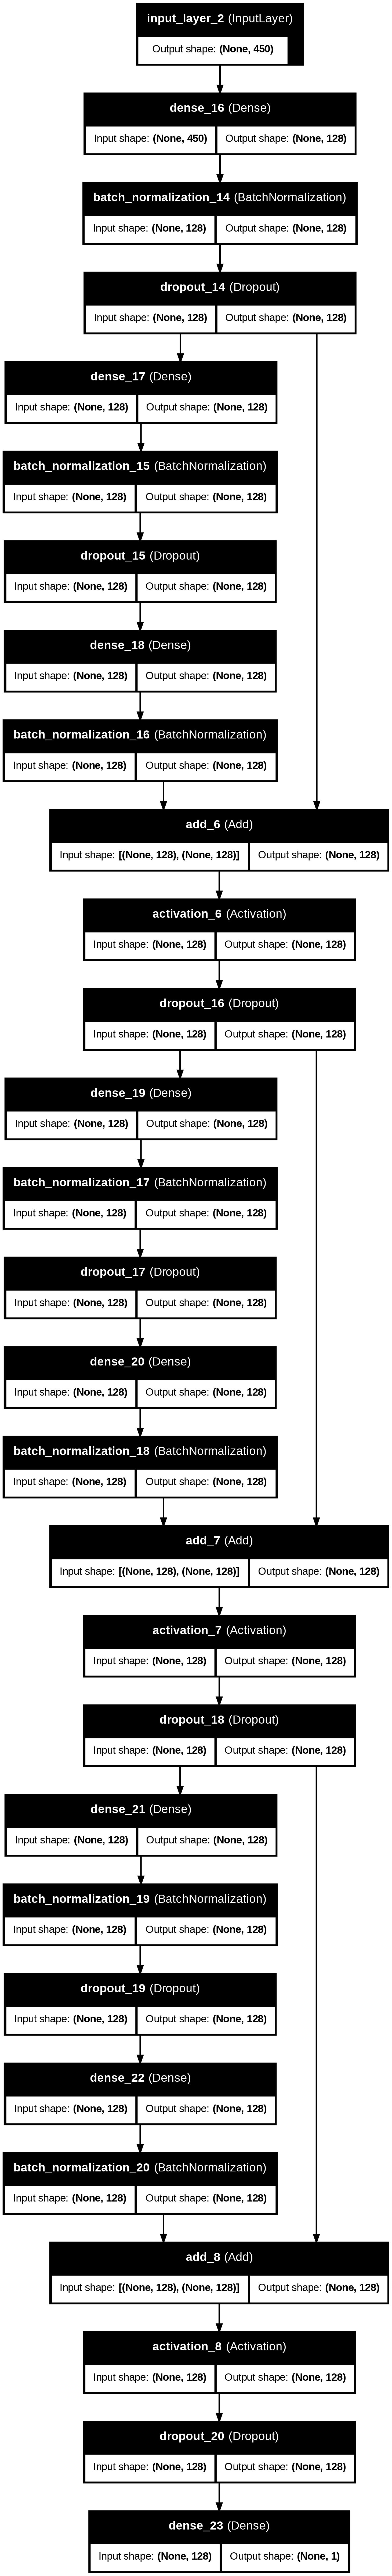

In [ ]:
# prompt: I want to plot this resnet model and see..help..no I just have above function..u did not even call the function..call the function build_resnet,else how will u plot?

!pip install pydot graphviz

from tensorflow.keras.utils import plot_model

# Assuming `model` is the ResNet model you built and want to plot
# You can call the build_resnet function again if needed, or use the `model` variable from the previous cell
model = build_resnet(input_dim, num_hidden_units=128, num_blocks=3, dropout_rate=0.5, l2_reg=0.01) # If you need to rebuild

plot_model(model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True)